<a href="https://colab.research.google.com/github/Gopika-S-Nair/Feature-Engineering-Variate-analysis/blob/main/001_visualization_variate_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving brooklyn.csv to brooklyn.csv


In [3]:
df = pd.read_csv('brooklyn.csv')

#EDA

In [4]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,2869,3600,3.0,2,900,4,1.0,15,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1,4318,3900,3.0,2,1000,4,9.0,8,0,0,0,0,1,0,0,0,Greenwood,Brooklyn
2,6265,2700,2.0,1,900,4,2.0,96,0,0,0,0,0,0,0,0,Gowanus,Brooklyn
3,24,4900,1.0,1,1216,6,3.0,88,0,0,0,0,0,0,0,0,Brooklyn Heights,Brooklyn
4,9481,3900,0.0,1,1100,3,4.0,85,1,0,0,0,0,0,0,0,Williamsburg,Brooklyn


In [5]:
df.tail()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
1008,7329,2300,1.0,1,900,5,2.0,88,0,0,0,0,0,0,0,0,Greenpoint,Brooklyn
1009,10286,3750,3.0,2,1531,1,1.0,10,0,0,1,1,1,1,0,0,Crown Heights,Brooklyn
1010,9169,4000,2.0,1,1080,5,1.0,117,0,0,0,0,0,0,0,0,Williamsburg,Brooklyn
1011,1721,4200,2.0,2,977,1,5.0,5,1,0,0,0,0,0,0,0,Downtown Brooklyn,Brooklyn
1012,1676,18000,3.0,2,2470,3,5.0,116,0,1,1,1,1,1,0,1,DUMBO,Brooklyn


In [6]:
df.shape

(1013, 18)

In [7]:
df.columns

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rental_id         1013 non-null   int64  
 1   rent              1013 non-null   int64  
 2   bedrooms          1013 non-null   float64
 3   bathrooms         1013 non-null   int64  
 4   size_sqft         1013 non-null   int64  
 5   min_to_subway     1013 non-null   int64  
 6   floor             1013 non-null   float64
 7   building_age_yrs  1013 non-null   int64  
 8   no_fee            1013 non-null   int64  
 9   has_roofdeck      1013 non-null   int64  
 10  has_washer_dryer  1013 non-null   int64  
 11  has_doorman       1013 non-null   int64  
 12  has_elevator      1013 non-null   int64  
 13  has_dishwasher    1013 non-null   int64  
 14  has_patio         1013 non-null   int64  
 15  has_gym           1013 non-null   int64  
 16  neighborhood      1013 non-null   object 


In [9]:
df.describe()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym
count,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.00000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000,1013.000000
mean,5948.951629,3327.403751,1.578973,1.234946,899.414610,4.721619,6.206318,55.730503,0.515301,0.06614,0.076012,0.103653,0.120434,0.089832,0.021718,0.076012
std,3146.852489,1602.395143,0.973555,0.474740,355.094481,3.285117,9.051340,44.330543,0.500013,0.24865,0.265148,0.304960,0.325630,0.286082,0.145832,0.265148
min,24.000000,1275.000000,0.000000,0.000000,250.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3375.000000,2400.000000,1.000000,1.000000,680.000000,2.000000,2.000000,7.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6144.000000,3000.000000,2.000000,1.000000,845.000000,4.000000,3.000000,77.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8676.000000,3850.000000,2.000000,1.000000,1000.000000,7.000000,6.000000,96.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11343.000000,18000.000000,5.000000,4.000000,3243.000000,43.000000,68.000000,174.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Data cleaning

In [10]:
df.isnull().sum()

rental_id           0
rent                0
bedrooms            0
bathrooms           0
size_sqft           0
min_to_subway       0
floor               0
building_age_yrs    0
no_fee              0
has_roofdeck        0
has_washer_dryer    0
has_doorman         0
has_elevator        0
has_dishwasher      0
has_patio           0
has_gym             0
neighborhood        0
borough             0
dtype: int64

#Univariate analysis

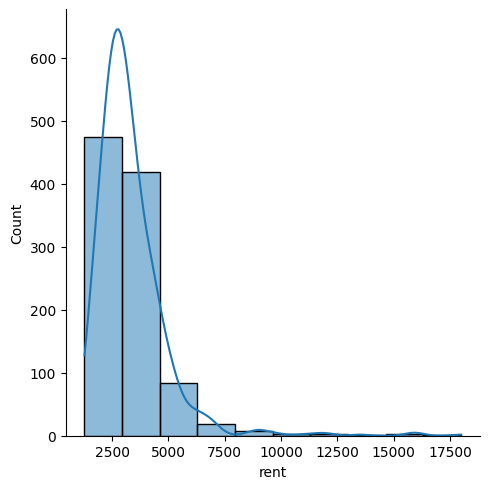

In [11]:
sns.displot(df.rent,bins = 10, kde = True)
plt.show()

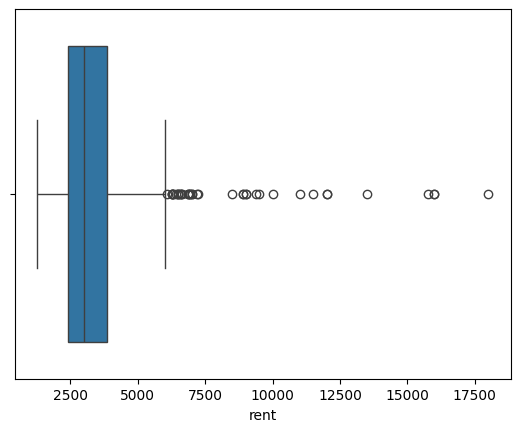

In [12]:
sns.boxplot(x = 'rent', data = df)
plt.show()

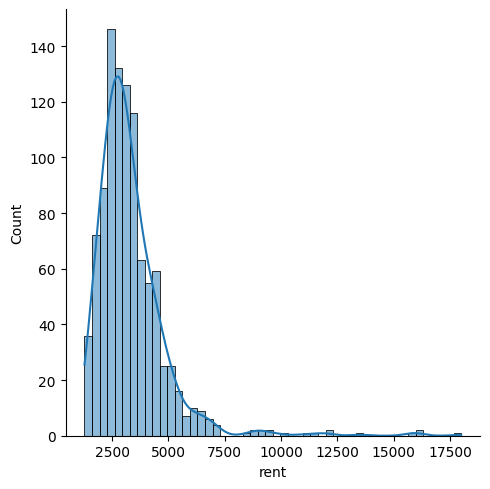

In [13]:
sns.displot(df.rent,bins = 50, kde = True)
plt.show()

<Axes: xlabel='size_sqft'>

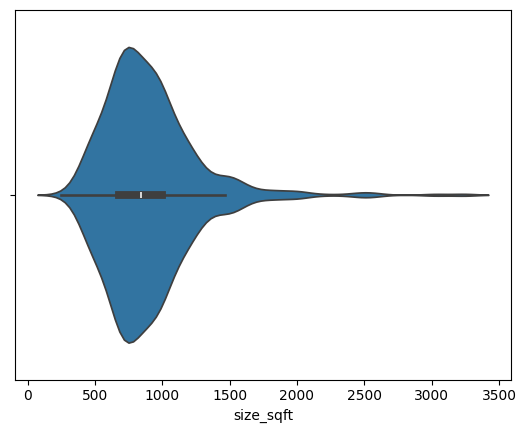

In [14]:
sns.violinplot(x = 'size_sqft', data = df)

#Bi variate anaysis

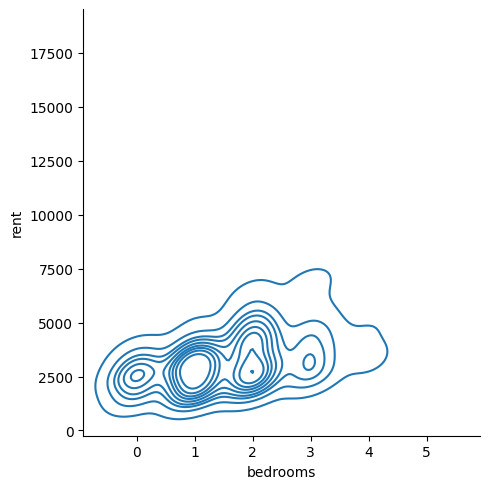

In [15]:
sns.displot(df, x="bedrooms", y="rent", kind = 'kde')

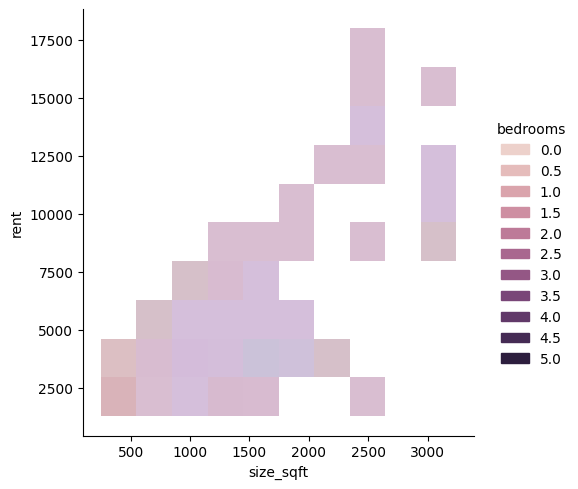

In [16]:
sns.displot(df, x="size_sqft", y="rent", hue="bedrooms", bins = 10)

<ipython-input-17-5afa3f6d70e6>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="size_sqft", y="rent", hue="bedrooms", bins = 5, kind = 'kde')
<ipython-input-17-5afa3f6d70e6>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="size_sqft", y="rent", hue="bedrooms", bins = 5, kind = 'kde')
<ipython-input-17-5afa3f6d70e6>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="size_sqft", y="rent", hue="bedrooms", bins = 5, kind = 'kde')
<ipython-input-17-5afa3f6d70e6>:1: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.displot(df, x="size_sqft", y="rent", hue="bedrooms", bins = 5, kind = 'kde')
/usr/local/lib/python3.10/di

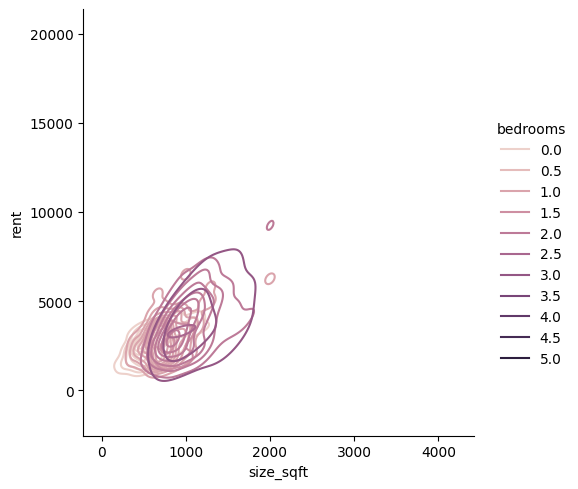

In [17]:
sns.displot(df, x="size_sqft", y="rent", hue="bedrooms", bins = 5, kind = 'kde')

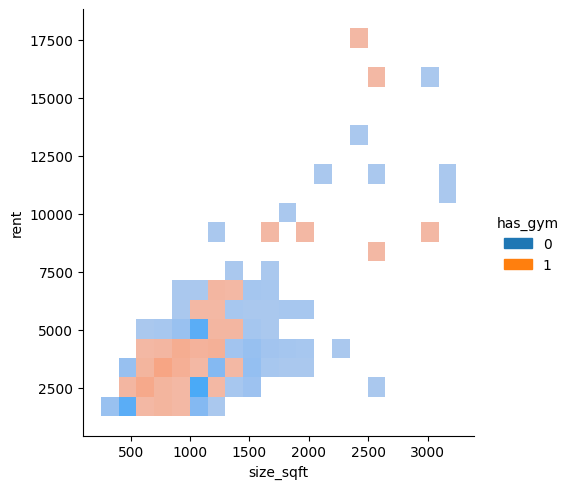

In [18]:

sns.displot(df, x="size_sqft", y="rent", hue="has_gym", bins = 20)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'bins'
  cset = contour_func(


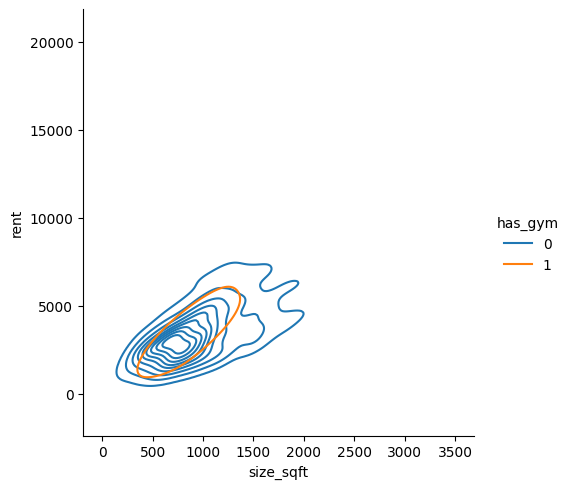

In [19]:
sns.displot(df, x="size_sqft", y="rent", hue="has_gym", bins = 20, kind = 'kde')

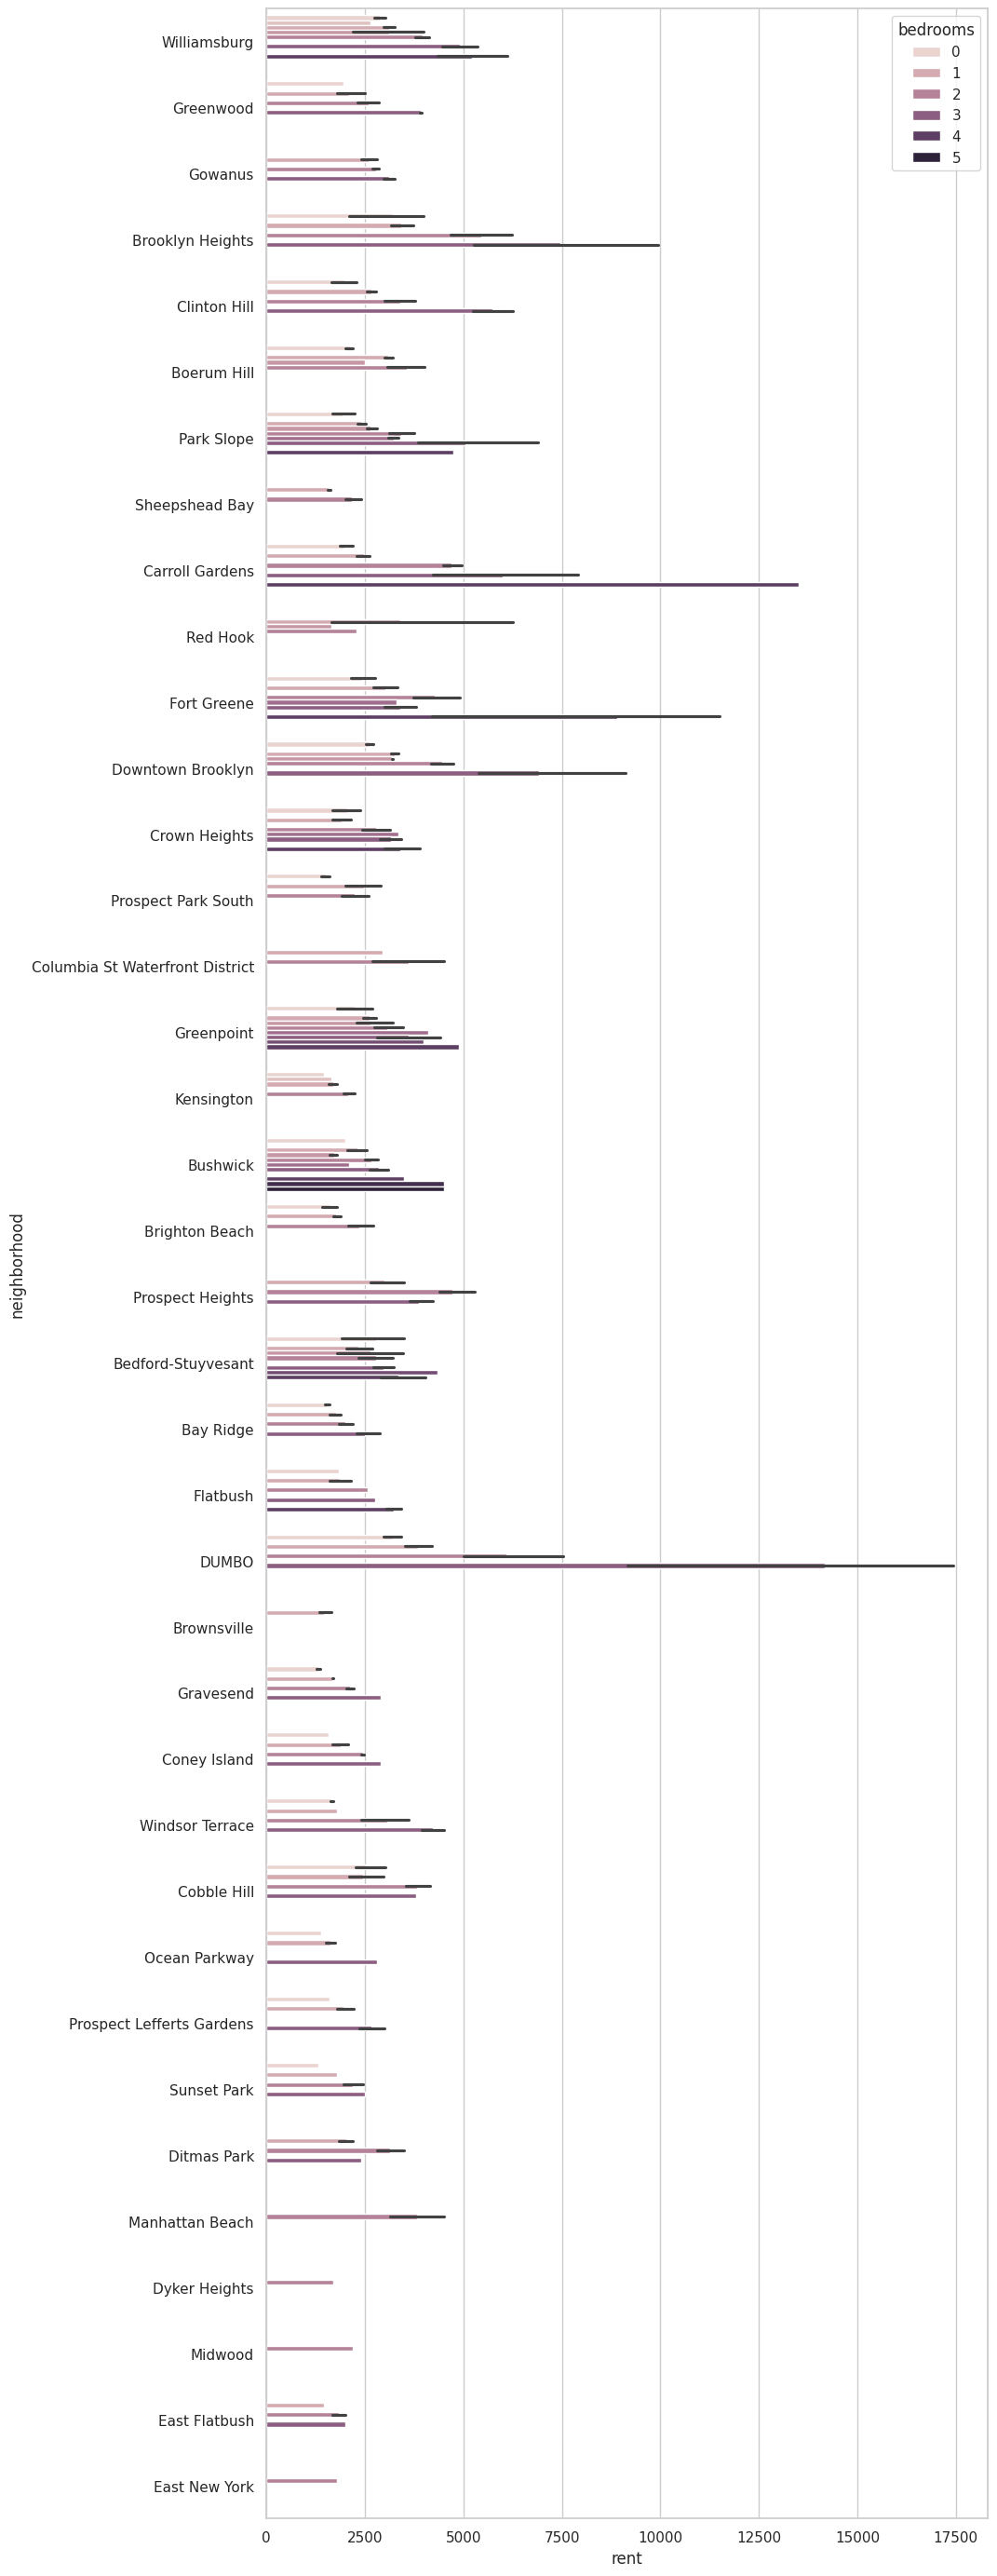

In [20]:
plt.figure(figsize = (10,35))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(df, x="rent", y="neighborhood", hue="bedrooms")

plt.show()

#Bi variate analyis

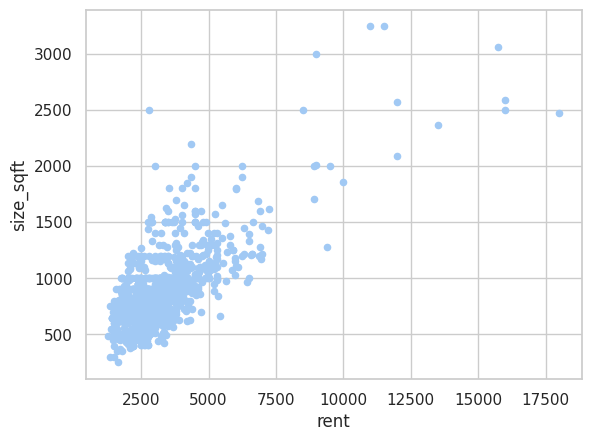

In [22]:
df.plot(x = 'rent', y = 'size_sqft', kind = 'scatter');
plt.show()

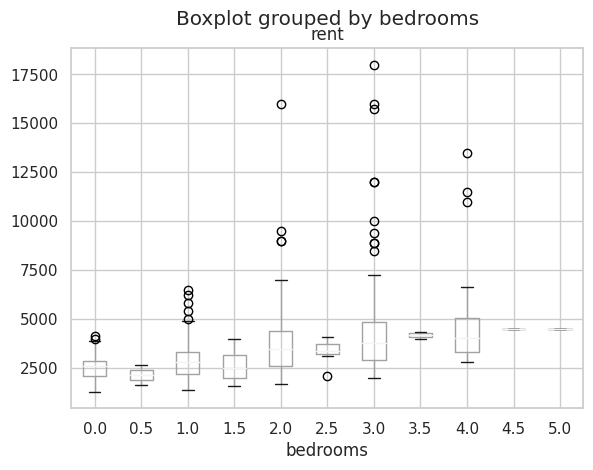

In [25]:
df.boxplot(column = 'rent', by = 'bedrooms');
plt.show()

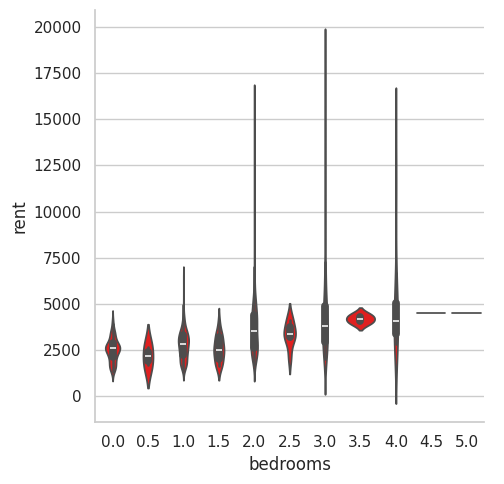

In [29]:
sns.catplot(data = df, x = 'bedrooms', y = 'rent',
                kind = 'violin', color = 'red');
plt.show()

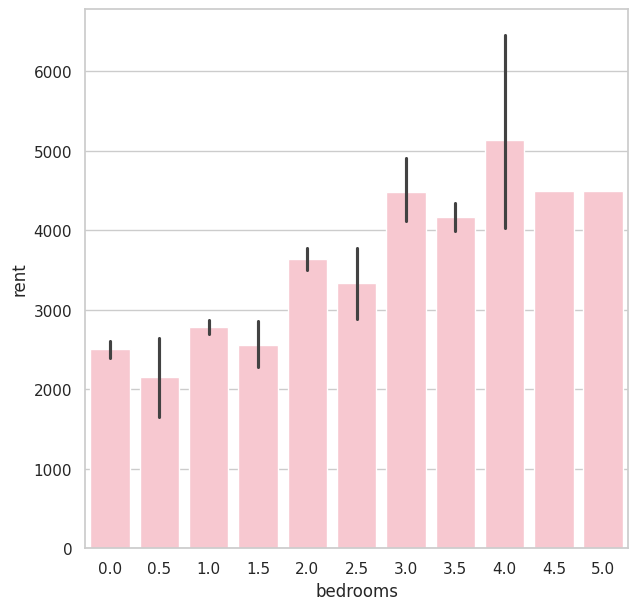

In [38]:
plt.figure(figsize = (7,7))
sns.barplot(data = df, x = 'bedrooms', y = 'rent', color = 'pink');
plt.show()

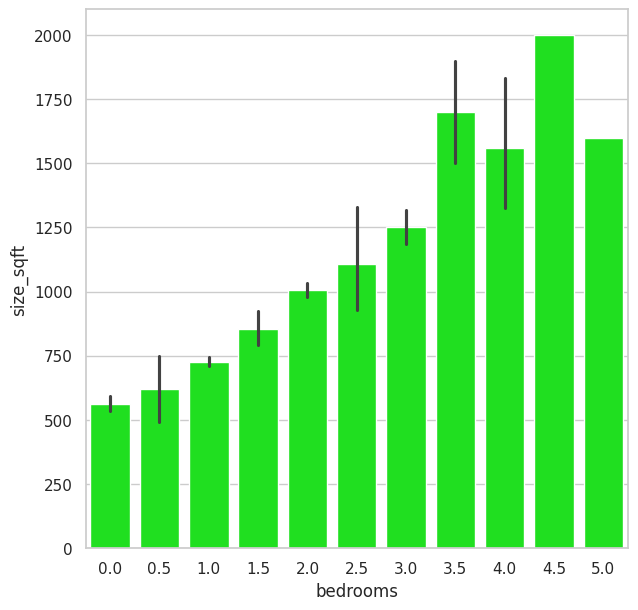

In [39]:
plt.figure(figsize = (7,7))
sns.barplot(data = df, x = 'bedrooms', y = 'size_sqft', color = 'lime');
plt.show()

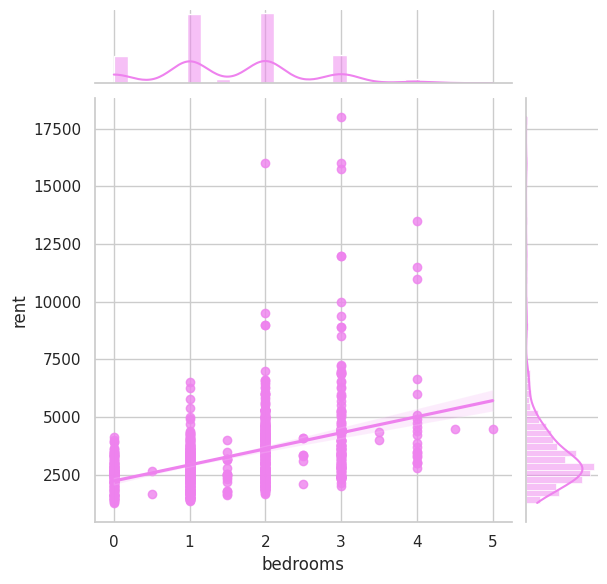

In [42]:
sns.jointplot(data = df, x = 'bedrooms', y = 'rent', kind = 'reg', color = 'violet');
plt.show()

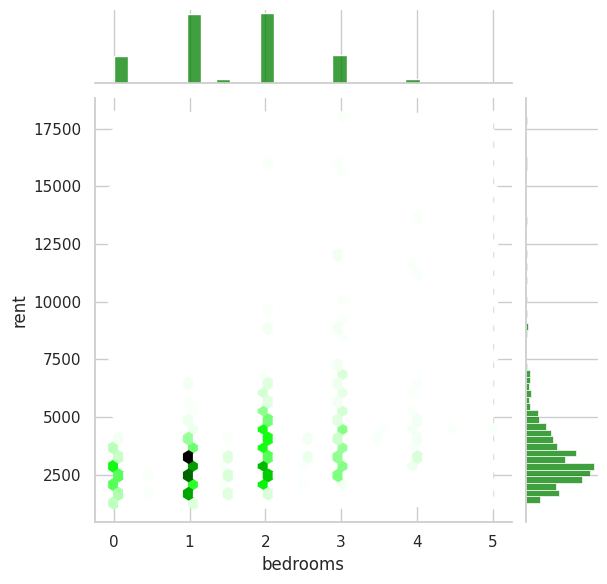

In [43]:
sns.jointplot(data = df, x = 'bedrooms', y = 'rent', kind = 'hex', color = 'green');
plt.show()